In [7]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. Thanks to viewer Daniel BA1/4hler for this suggestion

In [8]:
TRAIN_DIR = 'catdogdata/train'
TEST_DIR = 'catdogdata/test'
IMG_SIZE = 50
LR = 1e-3

In [9]:
def label_img(img):
    word_label = img.split('.')[0]
    
    if word_label == 'dog':
        return [1, 0]
    elif word_label == 'cat':
        return [0, 1]
    
label_img('cat.0.jpg')

[0, 1]

In [16]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        # Read image and turn it into grayscale
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        # Resize images into IMG_SIZE x IMG_SIZE
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img), np.array(label)])
        
    shuffle(training_data)
    np.save('training_data', training_data)
    print('Saved training data')
    return training_data

In [17]:
training_data = create_train_data()

100%|██████████| 25000/25000 [00:32<00:00, 770.41it/s]


Saved training data


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

[array([[176, 196, 253, ...,  64,  64,  63],
       [238, 242, 249, ...,  68,  66,  66],
       [254, 254, 255, ...,  66,  66,  66],
       ..., 
       [197, 195, 222, ..., 176, 174, 176],
       [227, 168, 208, ..., 174, 197, 226],
       [163, 167, 205, ..., 139, 130, 164]], dtype=uint8), array([0, 1])]


TypeError: Image data cannot be converted to float

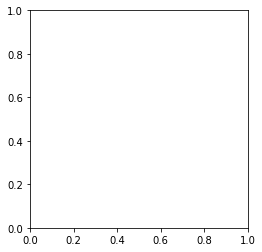

In [20]:
print(training_data[0])
plt.imshow(training_data[0])

TypeError: Image data cannot be converted to float

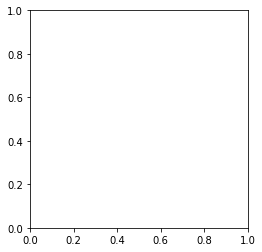

In [22]:
plt.imshow(os.listdir(TRAIN_DIR)[0])